In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ESG_Sample.csv')

c:\Users\jchoi02\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240793 entries, 0 to 240792
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Company Name              240793 non-null  object 
 1   Periods                   240793 non-null  object 
 2   Ticker                    240574 non-null  object 
 3   Universe Returns          239887 non-null  float64
 4   Region                    240793 non-null  object 
 5   Country                   240793 non-null  object 
 6   Sector                    240793 non-null  object 
 7   MCAP_USD                  240181 non-null  object 
 8   Earnings Yield            239635 non-null  object 
 9   Book to Price             239810 non-null  float64
 10  MSCI ESG Rating           231650 non-null  object 
 11  MSCI ESG Rating Quartile  86593 non-null   float64
 12  MSCI E                    231629 non-null  float64
 13  MSCI S                    231650 non-null  f

In [4]:
df['Periods'] = pd.to_datetime(df['Periods'], format='%m/%d/%Y')
df = df.sort_values(by=['Periods'], ascending=True)
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G
99048,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,"4,243.93",2.91,0.86,NaN,NaN,NaN,NaN,NaN
99275,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,"2,132.54",-2.69,1.03,NaN,NaN,NaN,NaN,NaN
87487,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,"6,834.84",-7.94,0.76,AA,NaN,7.82,7.03,7.23
223683,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,"54,928.41",6.09,0.38,A,NaN,8.12,5.70,7.09
114408,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,"5,661.15",1.37,0.35,BB,NaN,5.41,4.49,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106520,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,"8,907.07",3.04,0.24,B,4.0,4.80,4.70,3.50
172508,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,"19,830.94",2.01,0.20,BBB,3.0,8.00,5.40,6.40
172456,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,"36,135.76",2.00,-0.07,BB,3.0,2.50,3.00,3.90
173335,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,"29,916.88",-3.10,0.36,A,2.0,6.70,6.00,4.10


In [5]:
# 컬럼을 바꿀 규칙을 적는다. => 규칙을 함수로
def process_number(data):
    return float(data.replace(',', ''))

# 컬럼에 규칙을 적용한다. 
df['MCAP_USD'] = df['MCAP_USD'].astype(str) # 강제로 str으로 전체를 바꾼 후
df['MCAP_USD'] = df['MCAP_USD'].apply(process_number) # process_number 규칙을 적용한다.

df['Earnings Yield'] = df['Earnings Yield'].astype(str) # 강제로 str으로 전체를 바꾼 후
df['Earnings Yield'] = df['Earnings Yield'].apply(process_number) # process_number 규칙을 적용한다.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240793 entries, 99048 to 170823
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Company Name              240793 non-null  object        
 1   Periods                   240793 non-null  datetime64[ns]
 2   Ticker                    240574 non-null  object        
 3   Universe Returns          239887 non-null  float64       
 4   Region                    240793 non-null  object        
 5   Country                   240793 non-null  object        
 6   Sector                    240793 non-null  object        
 7   MCAP_USD                  240181 non-null  float64       
 8   Earnings Yield            239635 non-null  float64       
 9   Book to Price             239810 non-null  float64       
 10  MSCI ESG Rating           231650 non-null  object        
 11  MSCI ESG Rating Quartile  86593 non-null   float64       
 12

In [7]:
MCAP_sum = df.groupby(['Periods'])['MCAP_USD'].sum().to_frame('MCAP_sum')
MCAP_sum

,MCAP_sum
Periods,
2009-12-31,26719008.04
2010-01-29,25659930.87
2010-02-26,25912144.30
2010-03-31,27512504.83
2010-04-30,27584362.92
...,...
2021-11-30,71477495.84
2021-12-31,74681020.69
2022-01-31,70337126.46


In [8]:
df_n = pd.merge(df, MCAP_sum, on='Periods', how='left')
df_n

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum
0,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN,26719008.04
1,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN,26719008.04
2,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23,26719008.04
3,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,26719008.04
4,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49,26719008.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240788,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50,69923888.37
240789,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40,69923888.37
240790,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90,69923888.37
240791,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10,69923888.37


In [9]:
df_n['MCAP_wt'] = df_n['MCAP_USD'] / df_n['MCAP_sum']
df_n

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum,MCAP_wt
0,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000159
1,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000080
2,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23,26719008.04,0.000256
3,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,26719008.04,0.002056
4,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49,26719008.04,0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240788,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50,69923888.37,0.000127
240789,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40,69923888.37,0.000284
240790,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90,69923888.37,0.000517
240791,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10,69923888.37,0.000428


In [10]:
df_n['Earnings Yield_wtd'] = df_n['Earnings Yield'] * df_n['MCAP_wt']
df_n['Book to Price_wtd'] = df_n['Book to Price'] * df_n['MCAP_wt']
df_n

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum,MCAP_wt,Earnings Yield_wtd,Book to Price_wtd
0,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000159,0.000462,0.000137
1,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000080,-0.000215,0.000082
2,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23,26719008.04,0.000256,-0.002031,0.000194
3,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,26719008.04,0.002056,0.012520,0.000781
4,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49,26719008.04,0.000212,0.000290,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240788,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50,69923888.37,0.000127,0.000387,0.000031
240789,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40,69923888.37,0.000284,0.000570,0.000057
240790,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90,69923888.37,0.000517,0.001034,-0.000036
240791,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10,69923888.37,0.000428,-0.001326,0.000154


In [11]:
df_all = df_n

# ESG Rating 별 EY와 BTP 시총 가중평균 시계열 추이

In [12]:
# 평균값을 계산하고 싶은 칼럼
list = ['Book to Price_wtd']

# 평균값 계산, 날짜 포맷 및 정렬
df_all = df_all.groupby(['Periods', 'MSCI ESG Rating'])[list].sum().reset_index()
df_all['Periods'] = pd.to_datetime(df_all['Periods'], format='%m/%d/%Y')
df_all.sort_values(by='Periods', ascending=False)
df_all[:5]

,Periods,MSCI ESG Rating,Book to Price_wtd
0,2009-12-31,A,0.095488
1,2009-12-31,AA,0.096438
2,2009-12-31,AAA,0.085908
3,2009-12-31,B,0.035362
4,2009-12-31,BB,0.056297


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Periods            1036 non-null   datetime64[ns]
 1   MSCI ESG Rating    1036 non-null   object        
 2   Book to Price_wtd  1036 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 24.4+ KB


In [14]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_all_melt = pd.melt(df_all, id_vars=['Periods', 'MSCI ESG Rating'], value_vars=list, var_name='Indicators', value_name='wt_mean')
df_all_melt

,Periods,MSCI ESG Rating,Indicators,wt_mean
0,2009-12-31,A,Book to Price_wtd,0.095488
1,2009-12-31,AA,Book to Price_wtd,0.096438
2,2009-12-31,AAA,Book to Price_wtd,0.085908
3,2009-12-31,B,Book to Price_wtd,0.035362
4,2009-12-31,BB,Book to Price_wtd,0.056297
...,...,...,...,...
1031,2022-03-31,AAA,Book to Price_wtd,0.030380
1032,2022-03-31,B,Book to Price_wtd,0.015538
1033,2022-03-31,BB,Book to Price_wtd,0.035607
1034,2022-03-31,BBB,Book to Price_wtd,0.059209


In [15]:
def sort (row):
    if row['MSCI ESG Rating'] == "AAA" :
        return '0'
    if row['MSCI ESG Rating'] == "AA" :
        return '1'
    if row['MSCI ESG Rating'] == "A" :
        return '2'
    if row['MSCI ESG Rating'] == "BBB" :
        return '3'
    if row['MSCI ESG Rating'] == "BB" :
        return '4'
    if row['MSCI ESG Rating'] == "B" :
        return '5'
    if row['MSCI ESG Rating'] == "CCC" :
        return '6'

df_all_melt['sort'] = df_all_melt.apply(lambda row: sort(row), axis=1)

In [16]:
df_all_melt.sort_values(['Periods', 'sort'], ascending = True)

,Periods,MSCI ESG Rating,Indicators,wt_mean,sort
2,2009-12-31,AAA,Book to Price_wtd,0.085908,0
1,2009-12-31,AA,Book to Price_wtd,0.096438,1
0,2009-12-31,A,Book to Price_wtd,0.095488,2
5,2009-12-31,BBB,Book to Price_wtd,0.110367,3
4,2009-12-31,BB,Book to Price_wtd,0.056297,4
...,...,...,...,...,...
1029,2022-03-31,A,Book to Price_wtd,0.102337,2
1034,2022-03-31,BBB,Book to Price_wtd,0.059209,3
1033,2022-03-31,BB,Book to Price_wtd,0.035607,4
1032,2022-03-31,B,Book to Price_wtd,0.015538,5


In [45]:
df_all_melt

,Periods,MSCI ESG Rating,Indicators,wt_mean,sort
0,2009-12-31,A,Book to Price_wtd,0.095488,2
1,2009-12-31,AA,Book to Price_wtd,0.096438,1
2,2009-12-31,AAA,Book to Price_wtd,0.085908,0
3,2009-12-31,B,Book to Price_wtd,0.035362,5
4,2009-12-31,BB,Book to Price_wtd,0.056297,4
...,...,...,...,...,...
1031,2022-03-31,AAA,Book to Price_wtd,0.030380,0
1032,2022-03-31,B,Book to Price_wtd,0.015538,5
1033,2022-03-31,BB,Book to Price_wtd,0.035607,4
1034,2022-03-31,BBB,Book to Price_wtd,0.059209,3


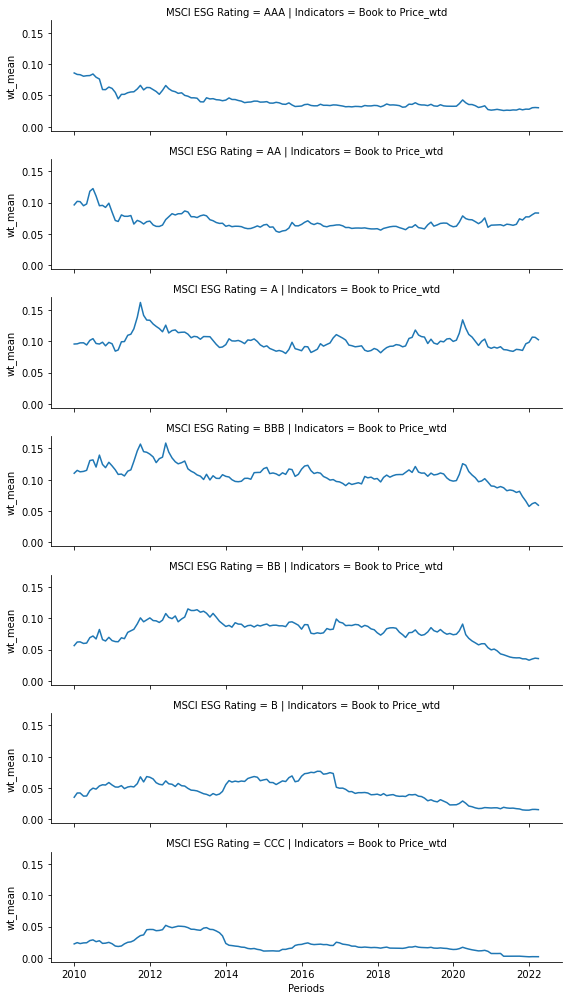

In [49]:
# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의

# sns.FacetGrid 안에서 row_order로 AAA~CCC까지 커스텀으로 정렬 가능

g = sns.FacetGrid(df_all_melt, col="Indicators", row_order=['AAA','AA','A','BBB','BB','B', 'CCC'], row="MSCI ESG Rating", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "wt_mean")

# 각 지역 내 ESG Rating 별 EY와 BTP 시총 가중평균 시계열 추이

In [18]:
df_eu = df_n[df_n['Region'] == "Europe"]
df_eu

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum,MCAP_wt,Earnings Yield_wtd,Book to Price_wtd
3,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,26719008.04,0.002056,0.012520,0.000781
11,Prudential plc,2009-12-31,PRU-GB,-10.38,Europe,United Kingdom,Financials,26168.06,-3.26,0.30,AAA,NaN,5.90,7.11,7.23,26719008.04,0.000979,-0.003193,0.000294
18,Luxottica Group S.p.A.,2009-12-31,LUX-IT,1.76,Europe,Italy,Consumer Discretionary,12019.03,3.58,0.34,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000450,0.001610,0.000153
20,Experian PLC,2009-12-31,EXPN-GB,-3.43,Europe,United Kingdom,Industrials,10190.07,5.04,0.20,BBB,NaN,7.12,5.69,5.03,26719008.04,0.000381,0.001922,0.000076
25,Eurasian Natural Resources Corporation PLC,2009-12-31,ENRC-GB,-1.42,Europe,United Kingdom,Materials,19027.64,11.30,0.38,B,NaN,3.73,2.72,2.50,26719008.04,0.000712,0.008047,0.000271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240769,Svenska Handelsbanken AB Class A,2022-03-31,SHB.A-SE,9.48,Europe,Sweden,Financials,18510.14,12.02,1.06,AA,1.0,10.00,5.40,5.90,69923888.37,0.000265,0.003182,0.000281
240770,Wartsila Oyj Abp,2022-03-31,WRT1V-FI,-12.13,Europe,Finland,Industrials,5468.51,3.98,0.46,AAA,1.0,7.80,3.30,6.40,69923888.37,0.000078,0.000311,0.000036
240778,L E Lundbergforetagen AB Class B,2022-03-31,LUND.B-SE,-7.38,Europe,Sweden,Financials,12789.32,10.12,0.84,A,2.0,6.90,6.00,2.70,69923888.37,0.000183,0.001851,0.000154
240780,GEA Group Aktiengesellschaft,2022-03-31,G1A-DE,-3.25,Europe,Germany,Industrials,7492.77,4.66,0.31,AA,1.0,4.80,5.70,6.80,69923888.37,0.000107,0.000499,0.000033


In [19]:
# 평균값을 계산하고 싶은 칼럼
list = ['Book to Price_wtd']

# 평균값 계산, 날짜 포맷 및 정렬
df_eu = df_eu.groupby(['Periods', 'MSCI ESG Rating'])[list].sum().reset_index()
df_eu['Periods'] = pd.to_datetime(df_eu['Periods'], format='%m/%d/%Y')
df_eu.sort_values(by='Periods', ascending=False)
df_eu[:5]

,Periods,MSCI ESG Rating,Book to Price_wtd
0,2009-12-31,A,0.034889
1,2009-12-31,AA,0.058033
2,2009-12-31,AAA,0.046498
3,2009-12-31,B,0.002785
4,2009-12-31,BB,0.014116


In [20]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_eu_melt = pd.melt(df_eu, id_vars=['Periods', 'MSCI ESG Rating'], value_vars=list, var_name='Indicators', value_name='wt_mean')
df_eu_melt

,Periods,MSCI ESG Rating,Indicators,wt_mean
0,2009-12-31,A,Book to Price_wtd,0.034889
1,2009-12-31,AA,Book to Price_wtd,0.058033
2,2009-12-31,AAA,Book to Price_wtd,0.046498
3,2009-12-31,B,Book to Price_wtd,0.002785
4,2009-12-31,BB,Book to Price_wtd,0.014116
...,...,...,...,...
1026,2022-03-31,AA,Book to Price_wtd,0.039739
1027,2022-03-31,AAA,Book to Price_wtd,0.017461
1028,2022-03-31,B,Book to Price_wtd,0.005176
1029,2022-03-31,BB,Book to Price_wtd,0.003662


In [21]:
def sort (row):
    if row['MSCI ESG Rating'] == "AAA" :
        return '0'
    if row['MSCI ESG Rating'] == "AA" :
        return '1'
    if row['MSCI ESG Rating'] == "A" :
        return '2'
    if row['MSCI ESG Rating'] == "BBB" :
        return '3'
    if row['MSCI ESG Rating'] == "BB" :
        return '4'
    if row['MSCI ESG Rating'] == "B" :
        return '5'
    if row['MSCI ESG Rating'] == "CCC" :
        return '6'

df_eu_melt['sort'] = df_eu_melt.apply(lambda row: sort(row), axis=1)

In [22]:
df_eu_melt.sort_values(['Periods', 'sort'], ascending = True)

,Periods,MSCI ESG Rating,Indicators,wt_mean,sort
2,2009-12-31,AAA,Book to Price_wtd,0.046498,0
1,2009-12-31,AA,Book to Price_wtd,0.058033,1
0,2009-12-31,A,Book to Price_wtd,0.034889,2
5,2009-12-31,BBB,Book to Price_wtd,0.040375,3
4,2009-12-31,BB,Book to Price_wtd,0.014116,4
...,...,...,...,...,...
1026,2022-03-31,AA,Book to Price_wtd,0.039739,1
1025,2022-03-31,A,Book to Price_wtd,0.029919,2
1030,2022-03-31,BBB,Book to Price_wtd,0.006670,3
1029,2022-03-31,BB,Book to Price_wtd,0.003662,4


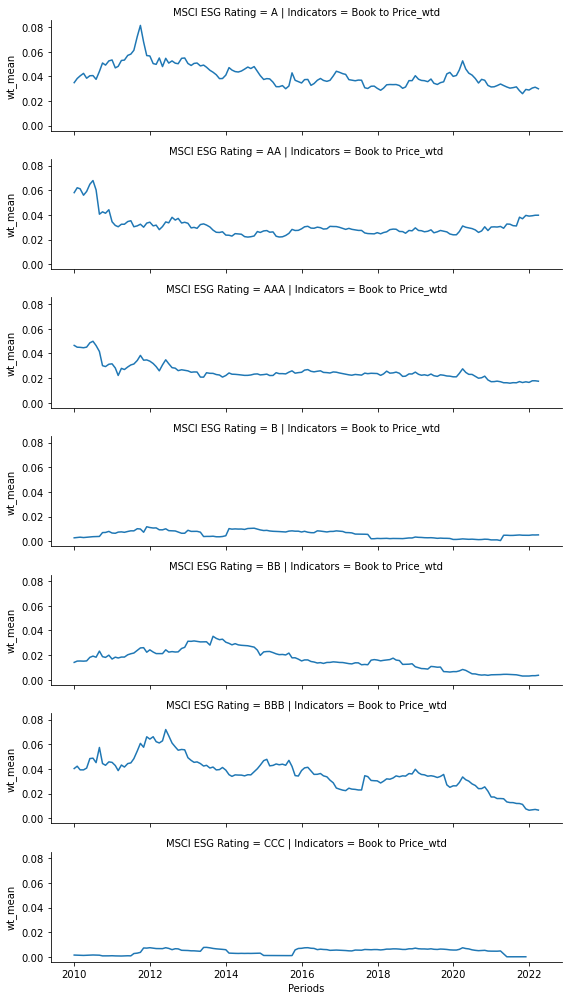

In [23]:
# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의
g = sns.FacetGrid(df_eu_melt, col="Indicators", row="MSCI ESG Rating", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "wt_mean")

In [24]:
df['Region'].unique()

array(['Japan', 'Europe', 'North America', 'Asia/Pacific Ex Japan',
       'Africa/Mideast'], dtype=object)

In [25]:
df_axjp = df_n[df_n['Region'] == "Asia/Pacific Ex Japan"]
df_axjp

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum,MCAP_wt,Earnings Yield_wtd,Book to Price_wtd
23,Fairfax Media Limited,2009-12-31,FXJ-AU,-1.74,Asia/Pacific Ex Japan,Australia,Consumer Discretionary,3680.50,-7.59,1.03,BBB,NaN,4.24,5.49,6.33,26719008.04,0.000138,-0.001046,0.000142
37,Shangri-La Asia Limited,2009-12-31,69-HK,-7.13,Asia/Pacific Ex Japan,Hong Kong,Consumer Discretionary,5435.72,1.79,0.74,BB,NaN,3.38,5.59,3.64,26719008.04,0.000203,0.000364,0.000151
40,Wesfarmers Limited,2009-12-31,WESN-AU,-12.54,Asia/Pacific Ex Japan,Australia,Consumer Staples,32530.45,3.47,0.60,BBB,NaN,4.97,4.58,5.48,26719008.04,0.001218,0.004225,0.000731
50,StarHub Ltd,2009-12-31,CC3-SG,0.94,Asia/Pacific Ex Japan,Singapore,Communication Services,2624.68,8.59,0.04,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000098,0.000844,0.000004
67,ASM Pacific Technology Limited,2009-12-31,522-HK,-12.79,Asia/Pacific Ex Japan,Hong Kong,Information Technology,3756.21,1.28,0.09,B,NaN,6.10,5.00,6.81,26719008.04,0.000141,0.000180,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240630,CK Infrastructure Holdings Limited,2022-03-31,1038-HK,0.57,Asia/Pacific Ex Japan,Hong Kong,Utilities,16874.84,5.63,0.87,BB,4.0,4.60,5.70,3.50,69923888.37,0.000241,0.001359,0.000210
240635,Sea Ltd. (Singapore) Sponsored ADR Class A,2022-03-31,SE-US,-30.91,Asia/Pacific Ex Japan,Singapore,Communication Services,66811.43,-2.97,0.11,B,4.0,6.70,4.20,1.70,69923888.37,0.000955,-0.002838,0.000105
240708,South32 Ltd.,2022-03-31,S32-AU,-10.08,Asia/Pacific Ex Japan,Australia,Materials,17519.02,6.58,0.55,BBB,2.0,1.50,5.20,7.70,69923888.37,0.000251,0.001649,0.000138
240774,"Hang Seng Bank, Limited",2022-03-31,11-HK,-7.91,Asia/Pacific Ex Japan,Hong Kong,Financials,36911.74,4.57,0.59,AA,1.0,4.60,4.90,6.70,69923888.37,0.000528,0.002412,0.000311


In [26]:
# 평균값을 계산하고 싶은 칼럼
list = ['Book to Price_wtd']

# 평균값 계산, 날짜 포맷 및 정렬
df_axjp = df_axjp.groupby(['Periods', 'MSCI ESG Rating'])[list].sum().reset_index()
df_axjp['Periods'] = pd.to_datetime(df_axjp['Periods'], format='%m/%d/%Y')
df_axjp.sort_values(by='Periods', ascending=False)
df_axjp[:5]

,Periods,MSCI ESG Rating,Book to Price_wtd
0,2009-12-31,A,0.003565
1,2009-12-31,AA,0.002419
2,2009-12-31,AAA,0.002600
3,2009-12-31,B,0.003506
4,2009-12-31,BB,0.003521


In [27]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_axjp_melt = pd.melt(df_axjp, id_vars=['Periods', 'MSCI ESG Rating'], value_vars=list, var_name='Indicators', value_name='wt_mean')
df_axjp_melt

,Periods,MSCI ESG Rating,Indicators,wt_mean
0,2009-12-31,A,Book to Price_wtd,0.003565
1,2009-12-31,AA,Book to Price_wtd,0.002419
2,2009-12-31,AAA,Book to Price_wtd,0.002600
3,2009-12-31,B,Book to Price_wtd,0.003506
4,2009-12-31,BB,Book to Price_wtd,0.003521
...,...,...,...,...
1031,2022-03-31,AAA,Book to Price_wtd,0.003132
1032,2022-03-31,B,Book to Price_wtd,0.001061
1033,2022-03-31,BB,Book to Price_wtd,0.001749
1034,2022-03-31,BBB,Book to Price_wtd,0.002278


In [28]:
def sort (row):
    if row['MSCI ESG Rating'] == "AAA" :
        return '0'
    if row['MSCI ESG Rating'] == "AA" :
        return '1'
    if row['MSCI ESG Rating'] == "A" :
        return '2'
    if row['MSCI ESG Rating'] == "BBB" :
        return '3'
    if row['MSCI ESG Rating'] == "BB" :
        return '4'
    if row['MSCI ESG Rating'] == "B" :
        return '5'
    if row['MSCI ESG Rating'] == "CCC" :
        return '6'

df_axjp_melt['sort'] = df_axjp_melt.apply(lambda row: sort(row), axis=1)

In [29]:
df_axjp_melt.sort_values(['Periods', 'sort'], ascending = True)

,Periods,MSCI ESG Rating,Indicators,wt_mean,sort
2,2009-12-31,AAA,Book to Price_wtd,0.002600,0
1,2009-12-31,AA,Book to Price_wtd,0.002419,1
0,2009-12-31,A,Book to Price_wtd,0.003565,2
5,2009-12-31,BBB,Book to Price_wtd,0.010031,3
4,2009-12-31,BB,Book to Price_wtd,0.003521,4
...,...,...,...,...,...
1029,2022-03-31,A,Book to Price_wtd,0.007478,2
1034,2022-03-31,BBB,Book to Price_wtd,0.002278,3
1033,2022-03-31,BB,Book to Price_wtd,0.001749,4
1032,2022-03-31,B,Book to Price_wtd,0.001061,5


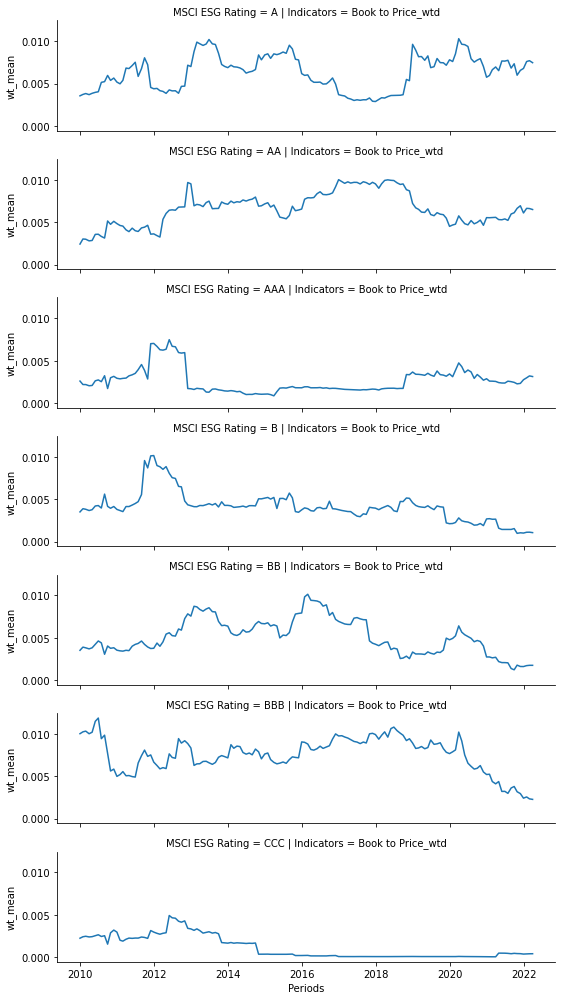

In [30]:
# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의
g = sns.FacetGrid(df_axjp_melt, col="Indicators", row="MSCI ESG Rating", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "wt_mean")

# 각 지역 한번에 비교

In [31]:
df_rg = df_n
df_rg

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,MCAP_sum,MCAP_wt,Earnings Yield_wtd,Book to Price_wtd
0,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000159,0.000462,0.000137
1,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN,26719008.04,0.000080,-0.000215,0.000082
2,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23,26719008.04,0.000256,-0.002031,0.000194
3,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,26719008.04,0.002056,0.012520,0.000781
4,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49,26719008.04,0.000212,0.000290,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240788,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50,69923888.37,0.000127,0.000387,0.000031
240789,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40,69923888.37,0.000284,0.000570,0.000057
240790,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90,69923888.37,0.000517,0.001034,-0.000036
240791,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10,69923888.37,0.000428,-0.001326,0.000154


In [32]:
# 평균값을 계산하고 싶은 칼럼
list = ['Earnings Yield_wtd']

# 평균값 계산, 날짜 포맷 및 정렬
df_rg = df_rg.groupby(['Periods', 'MSCI ESG Rating', 'Region'])[list].sum().reset_index()
df_rg['Periods'] = pd.to_datetime(df_rg['Periods'], format='%m/%d/%Y')
df_rg.sort_values(by='Periods', ascending=False)
df_rg[:5]

,Periods,MSCI ESG Rating,Region,Earnings Yield_wtd
0,2009-12-31,A,Asia/Pacific Ex Japan,0.014809
1,2009-12-31,A,Europe,0.148878
2,2009-12-31,A,Japan,-0.046836
3,2009-12-31,A,North America,0.152233
4,2009-12-31,AA,Asia/Pacific Ex Japan,0.042576


In [33]:
df_rg = df_rg.pivot(index = ['Periods', 'MSCI ESG Rating'], columns = 'Region', values = 'Earnings Yield_wtd').reset_index()
df_rg

Region,Periods,MSCI ESG Rating,Africa/Mideast,Asia/Pacific Ex Japan,Europe,Japan,North America
0,2009-12-31,A,NaN,0.014809,0.148878,-0.046836,0.152233
1,2009-12-31,AA,NaN,0.042576,0.482075,-0.020667,0.420409
2,2009-12-31,AAA,-0.001003,0.000494,0.330771,-0.059399,-0.018185
3,2009-12-31,B,NaN,0.029360,0.036802,-0.018208,0.022360
4,2009-12-31,BB,NaN,0.030408,-0.136165,-0.031631,0.020556
...,...,...,...,...,...,...,...
1031,2022-03-31,AAA,NaN,0.019754,0.248064,0.048271,0.185558
1032,2022-03-31,B,0.000594,0.003645,0.034642,0.010810,0.145501
1033,2022-03-31,BB,0.002592,0.008227,0.067628,0.043599,0.423865
1034,2022-03-31,BBB,0.001166,0.013122,0.050097,0.080025,0.833203


In [34]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_rg = pd.melt(df_rg, id_vars=['Periods', 'MSCI ESG Rating'], value_vars=['North America', 'Europe', 'Asia/Pacific Ex Japan', 'Japan', 'Africa/Mideast'], var_name='Indicators', value_name='wt_mean')
df_rg

,Periods,MSCI ESG Rating,Indicators,wt_mean
0,2009-12-31,A,North America,0.152233
1,2009-12-31,AA,North America,0.420409
2,2009-12-31,AAA,North America,-0.018185
3,2009-12-31,B,North America,0.022360
4,2009-12-31,BB,North America,0.020556
...,...,...,...,...
5175,2022-03-31,AAA,Africa/Mideast,NaN
5176,2022-03-31,B,Africa/Mideast,0.000594
5177,2022-03-31,BB,Africa/Mideast,0.002592
5178,2022-03-31,BBB,Africa/Mideast,0.001166


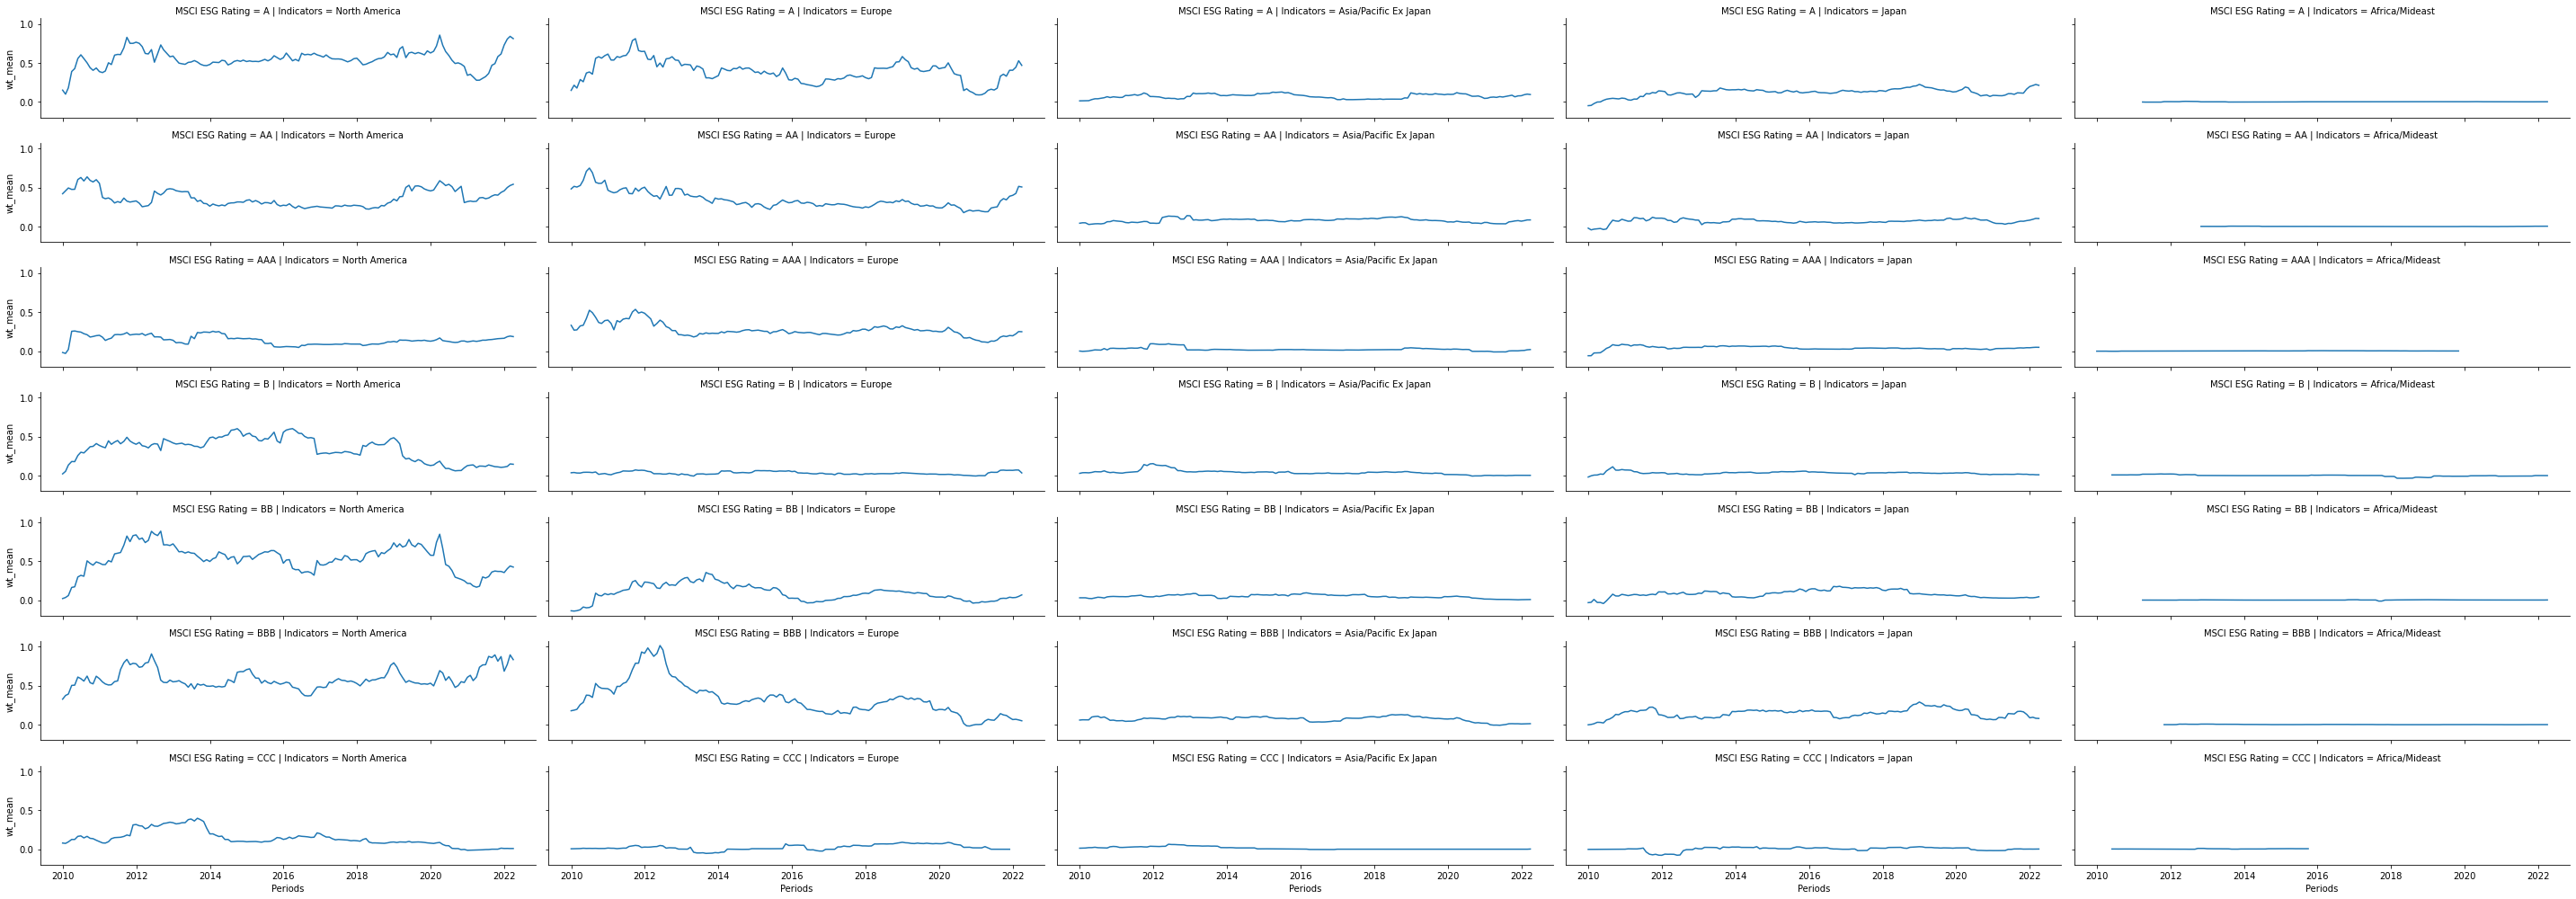

In [35]:
# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의
# 등급 순서 어떻게 정렬? text는 정렬이 잘 안됨.

g = sns.FacetGrid(df_rg, col="Indicators", row="MSCI ESG Rating", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "wt_mean")

In [36]:
df_rg = df_n

In [37]:
# 평균값을 계산하고 싶은 칼럼
list = ['Book to Price_wtd']

# 평균값 계산, 날짜 포맷 및 정렬
df_rg = df_rg.groupby(['Periods', 'MSCI ESG Rating', 'Region'])[list].sum().reset_index()
df_rg['Periods'] = pd.to_datetime(df_rg['Periods'], format='%m/%d/%Y')
df_rg.sort_values(by='Periods', ascending=False)
df_rg[:5]

,Periods,MSCI ESG Rating,Region,Book to Price_wtd
0,2009-12-31,A,Asia/Pacific Ex Japan,0.003565
1,2009-12-31,A,Europe,0.034889
2,2009-12-31,A,Japan,0.013336
3,2009-12-31,A,North America,0.043697
4,2009-12-31,AA,Asia/Pacific Ex Japan,0.002419


In [38]:
df_rg = df_rg.pivot(index = ['Periods', 'MSCI ESG Rating'], columns = 'Region', values = 'Book to Price_wtd').reset_index()
df_rg

Region,Periods,MSCI ESG Rating,Africa/Mideast,Asia/Pacific Ex Japan,Europe,Japan,North America
0,2009-12-31,A,NaN,0.003565,0.034889,0.013336,0.043697
1,2009-12-31,AA,NaN,0.002419,0.058033,0.011344,0.024642
2,2009-12-31,AAA,0.000477,0.002600,0.046498,0.017506,0.018826
3,2009-12-31,B,NaN,0.003506,0.002785,0.007992,0.021079
4,2009-12-31,BB,NaN,0.003521,0.014116,0.010283,0.028377
...,...,...,...,...,...,...,...
1031,2022-03-31,AAA,NaN,0.003132,0.017461,0.003978,0.005808
1032,2022-03-31,B,0.000147,0.001061,0.005176,0.002518,0.006636
1033,2022-03-31,BB,0.000163,0.001749,0.003662,0.003676,0.026358
1034,2022-03-31,BBB,0.000047,0.002278,0.006670,0.006959,0.043255


In [39]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_rg = pd.melt(df_rg, id_vars=['Periods', 'MSCI ESG Rating'], value_vars=['North America', 'Europe', 'Asia/Pacific Ex Japan', 'Japan', 'Africa/Mideast'], var_name='Indicators', value_name='wt_mean')
df_rg

,Periods,MSCI ESG Rating,Indicators,wt_mean
0,2009-12-31,A,North America,0.043697
1,2009-12-31,AA,North America,0.024642
2,2009-12-31,AAA,North America,0.018826
3,2009-12-31,B,North America,0.021079
4,2009-12-31,BB,North America,0.028377
...,...,...,...,...
5175,2022-03-31,AAA,Africa/Mideast,NaN
5176,2022-03-31,B,Africa/Mideast,0.000147
5177,2022-03-31,BB,Africa/Mideast,0.000163
5178,2022-03-31,BBB,Africa/Mideast,0.000047


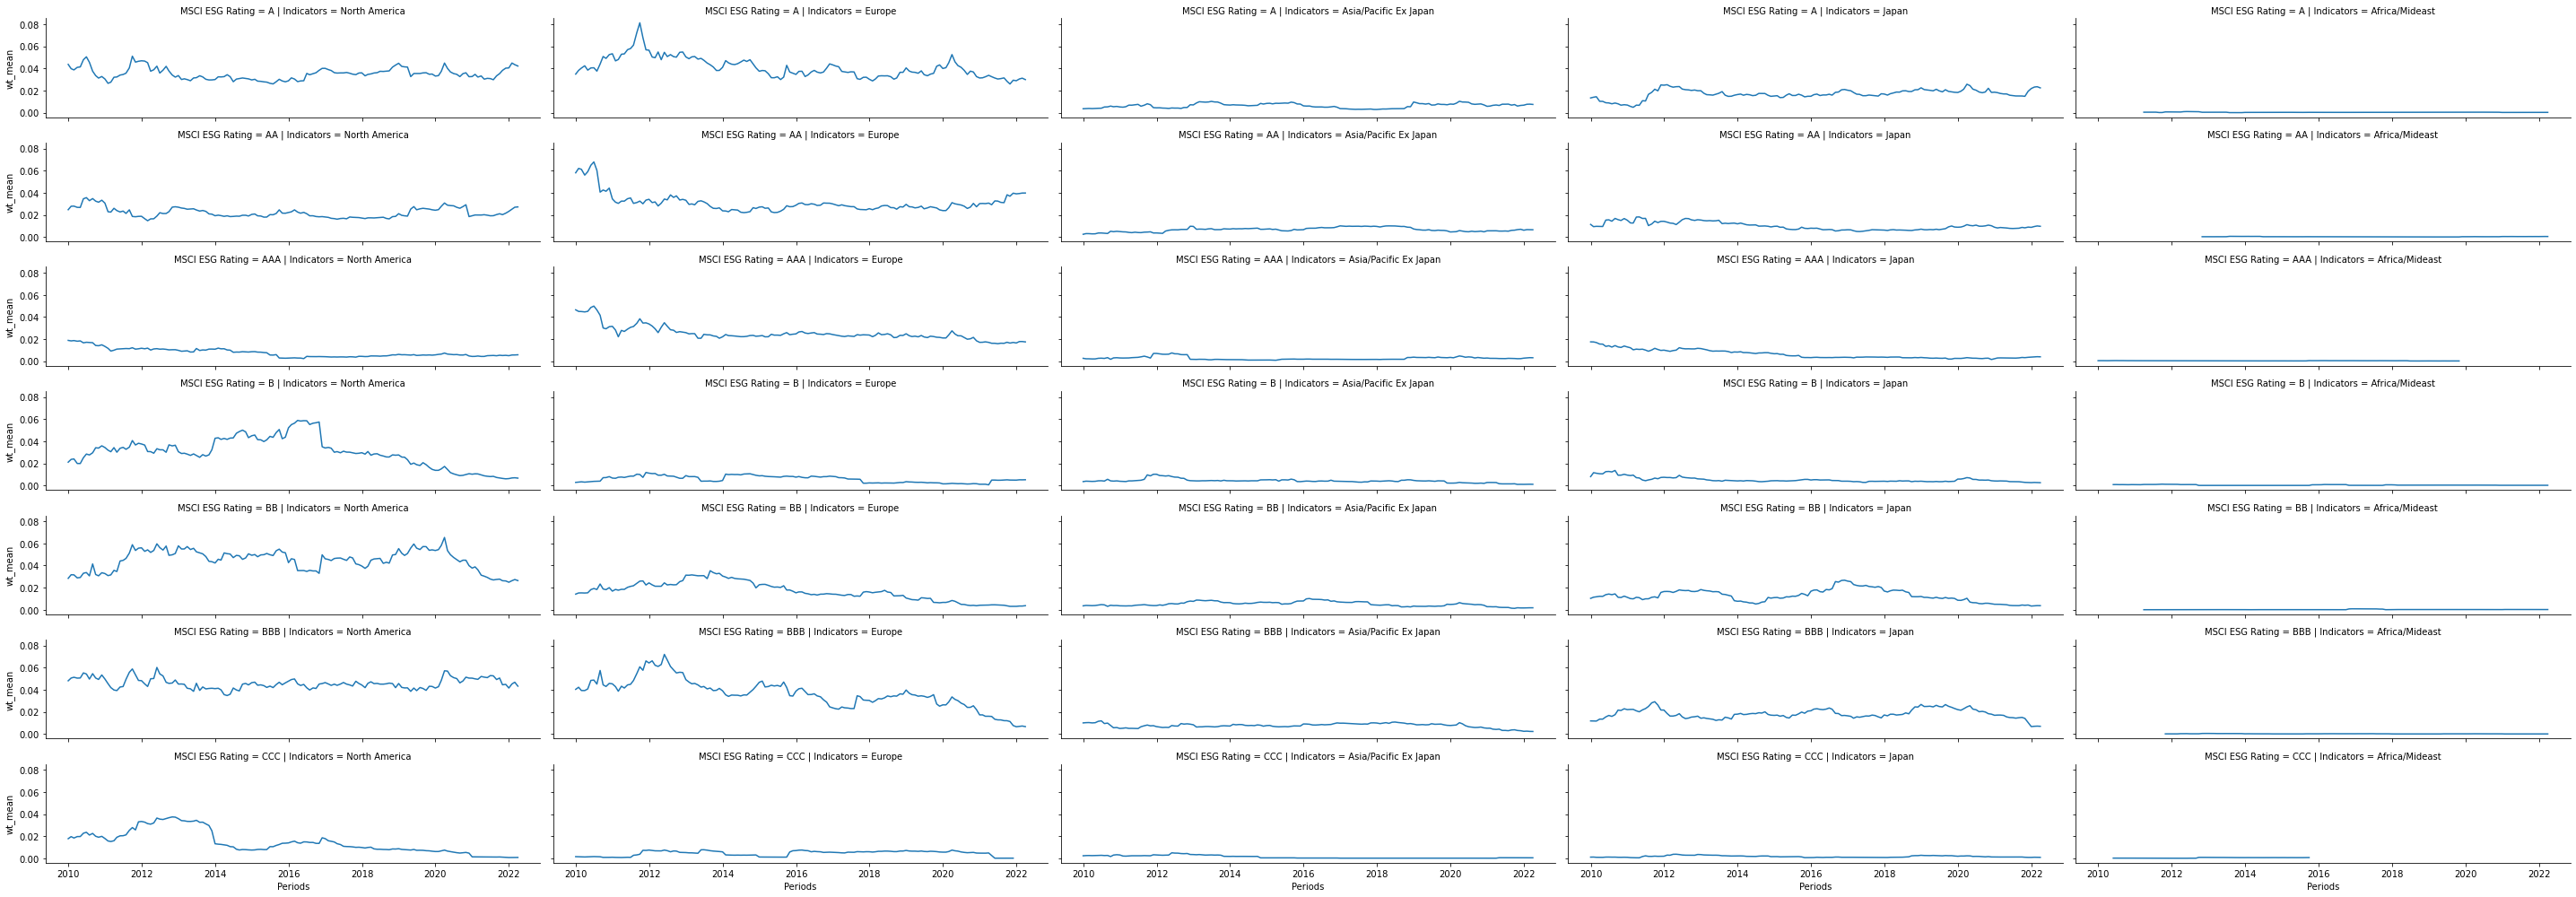

In [40]:
# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의
g = sns.FacetGrid(df_rg, col="Indicators", row="MSCI ESG Rating", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "wt_mean")

## Which pillar comes at the highest cost to invest?

In [41]:
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G
99048,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN
99275,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN
87487,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23
223683,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09
114408,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106520,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50
172508,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40
172456,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90
173335,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10


In [42]:
df_pillar_all = df
df_pillar_all['E_Q'] = df_pillar_all.groupby(['Periods'])['MSCI E'].transform(lambda x: pd.qcut(x, 4, labels = False, duplicates = 'drop')) + 1
df_pillar_all['S_Q'] = df_pillar_all.groupby(['Periods'])['MSCI S'].transform(lambda x: pd.qcut(x, 4, labels = False, duplicates = 'drop')) + 1
df_pillar_all['G_Q'] = df_pillar_all.groupby(['Periods'])['MSCI G'].transform(lambda x: pd.qcut(x, 4, labels = False, duplicates = 'drop')) + 1
df_pillar_all

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,Book to Price,MSCI ESG Rating,MSCI ESG Rating Quartile,MSCI E,MSCI S,MSCI G,E_Q,S_Q,G_Q
99048,"Daihatsu Motor Co., Ltd.",2009-12-31,7262-JP,-3.75,Japan,Japan,Consumer Discretionary,4243.93,2.91,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99275,Daicel Corporation,2009-12-31,4202-JP,2.69,Japan,Japan,Materials,2132.54,-2.69,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87487,ANA Holdings Inc.,2009-12-31,9202-JP,7.17,Japan,Japan,Industrials,6834.84,-7.94,0.76,AA,NaN,7.82,7.03,7.23,4.0,4.0,4.0
223683,Tesco PLC,2009-12-31,TSCO-GB,-1.34,Europe,United Kingdom,Consumer Staples,54928.41,6.09,0.38,A,NaN,8.12,5.70,7.09,4.0,3.0,4.0
114408,"Kintetsu Group Holdings Co., Ltd.",2009-12-31,9041-JP,4.03,Japan,Japan,Industrials,5661.15,1.37,0.35,BB,NaN,5.41,4.49,4.49,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106520,Hamamatsu Photonics K.K.,2022-03-31,6965-JP,-16.19,Japan,Japan,Information Technology,8907.07,3.04,0.24,B,4.0,4.80,4.70,3.50,2.0,2.0,1.0
172508,TransUnion,2022-03-31,TRU-US,-15.31,North America,United States,Industrials,19830.94,2.01,0.20,BBB,3.0,8.00,5.40,6.40,4.0,3.0,4.0
172456,TransDigm Group Incorporated,2022-03-31,TDG-US,-8.71,North America,United States,Industrials,36135.76,2.00,-0.07,BB,3.0,2.50,3.00,3.90,1.0,1.0,1.0
173335,"Twilio, Inc. Class A",2022-03-31,TWLO-US,-32.15,North America,United States,Information Technology,29916.88,-3.10,0.36,A,2.0,6.70,6.00,4.10,3.0,3.0,1.0


In [43]:
E_EY_mean = pd.pivot_table(df_pillar_all, index=['Periods'], columns=['E_Q'], values=['Earnings Yield'], aggfunc='mean')

<AxesSubplot:xlabel='Periods'>

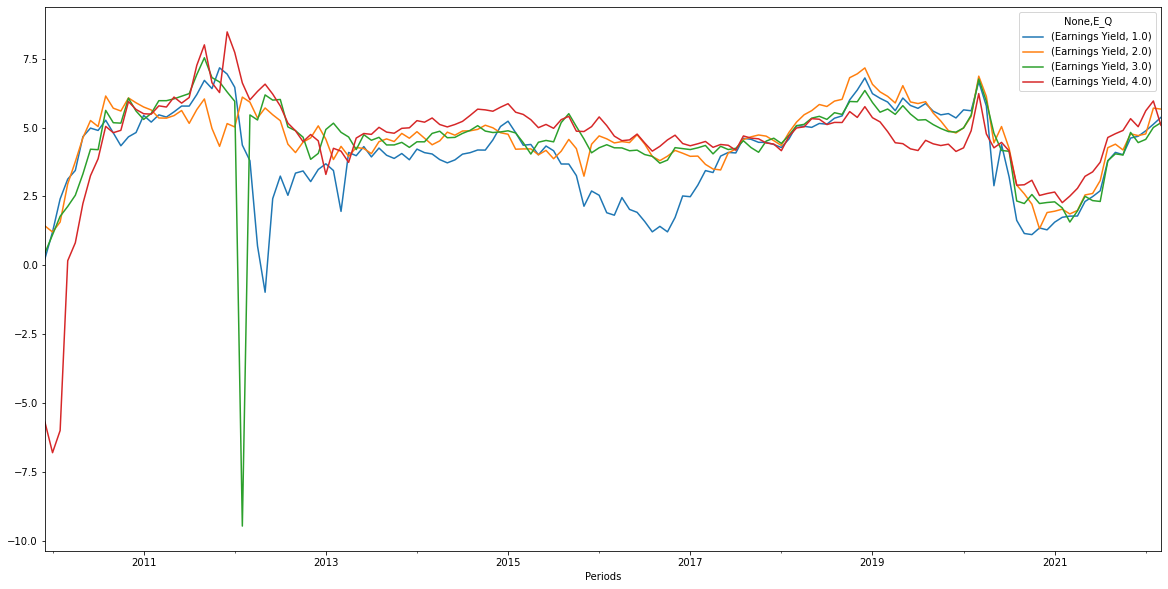

In [44]:
# higher quartile, the better score is
E_EY_mean.plot(kind = 'line', figsize = (20,10))